In [2]:
import torch.nn as nn
import torch
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor

In [5]:
class MLP(nn.Module):
    def __init__(self, layers_sizes: list):
        super(MLP, self).__init__()
        self.net = []
        for i, sz in enumerate(layers_sizes):
            if i + 1 != len(layers_sizes):
                self.net.append(nn.Linear(sz, layers_sizes[i + 1]))

    def forward(self, x):
        for layer in self.net:
            x = layer(x)
            x = torch.tanh(x)
        return x

    def parameters(self, recurse: bool = True):
        for layer in self.net:
            for param in layer.parameters():
                yield param


class VAE(nn.Module):

    def __init__(self, encoder_sizes: list, decoder_sizes, dim: int):
        super(VAE, self).__init__()
        self.encoder = MLP(encoder_sizes)

        self.to_mean = nn.Linear(encoder_sizes[-1], dim)
        self.to_cov = nn.Linear(encoder_sizes[-1], dim)
        self.to_decoder = nn.Linear(dim, decoder_sizes[1])

        self.decoder = MLP(decoder_sizes)

    def forward(self, x):
        self.encoder(x)




In [30]:
def learn(nt, X, y, epochs=1):
    optimizer = optim.SGD(nt.parameters(), lr=0.01, momentum=0.9)
    criterion = nn.MSELoss()

    X = Tensor(X)
    y = Tensor(y)

    errors = []
    for epoch in range(epochs):
        for i, x in enumerate(X):
            optimizer.zero_grad()

            outputs = nt(x)
            loss = criterion(outputs, y[i])
            loss.backward()
            optimizer.step()

            errors.append(loss.item())
    return errors

In [32]:
net = MLP([3, 3, 2])
errors = learn(net, np.ones((100, 3)), np.zeros((100, 2)))

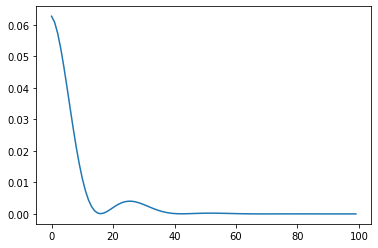

In [33]:
plt.plot(range(len(errors)), errors)